In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import datetime
from pandas import DataFrame

In [71]:
df = pd.read_csv('new轨迹.csv', names=['昵称', '内容', '日期'], encoding='utf-8')
df['日期'] = pd.to_datetime(df['日期'])
df = df.set_index('日期', drop=False)
df

,昵称,内容,日期
日期,,,
2021-03-30 15:01:00,闲来无事听两遍花海,16岁的梦想就是能和你永远在一起，\n\n如今27岁，最大的梦想就是把你忘记。\n\n现在终...,2021-03-30 15:01:00
2021-03-30 13:18:00,筱筱,太伤感了,2021-03-30 13:18:00
2021-03-30 12:42:00,ocean,3.24我们没有故事了，再见，我的男孩。我会发着呆，然后忘记你。,2021-03-30 12:42:00
2021-03-30 10:34:00,慢慢.,明天就出单招考试的录取结果了，虽然已经知道分数考上这个专业希望微乎极微，也已经做好了准备，但...,2021-03-30 10:34:00
2021-03-30 09:03:00,poiuwjd,16岁的梦想就是能和你永远在一起，\n\n如今27岁，最大的梦想就是把你忘记。\n\n现在终...,2021-03-30 09:03:00
...,...,...,...
2017-12-03 19:21:00,Hala Madrid,不知我们的轨迹从何时开始跑偏了。,2017-12-03 19:21:00
2017-12-03 18:00:00,盒子,我有一个很好的大学同学，我每次追女孩都请她撮合，每次失恋也是她安慰我。毕业那天我跟女朋友分手...,2017-12-03 18:00:00
2017-12-03 16:57:00,狩擭、妠,一次次的喜欢，一次次的不勇敢，一次次的错过，一次次的受伤，一次次的期待，一次次的重复，是我心...,2017-12-03 16:57:00


In [72]:
s = df['内容']
year = s.resample("12M").count()
year = year.astype('int32')

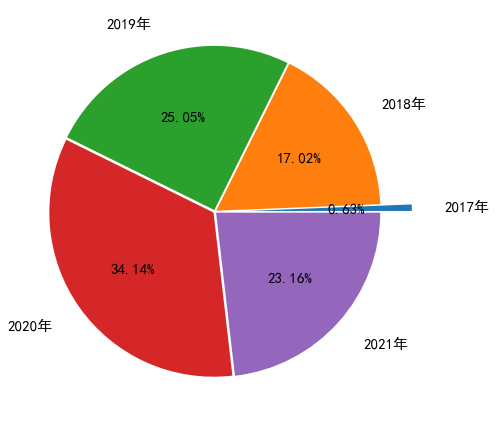

In [73]:
rcParams['font.family']="SimHei"
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(year, labels=[i + '年' for i in '2017,2018,2019,2020,2021'.split(",")],
       autopct="%.2f%%",
       explode=[0.2] +[0.01 for i in range(4)],
       pctdistance=0.6,
      labeldistance=1.2,
      radius=1,
      textprops={'fontsize':15,
                'color':'k'})

plt.tight_layout()
plt.show()

In [74]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
from pyecharts.globals import ThemeType


bar = Bar(init_opts=opts.InitOpts(bg_color='white'),
         )
bar.add_xaxis("2017年 2018年 2019年 2020年 2021年".split(" "))
bar.add_yaxis("年份",year.to_list())
bar.set_global_opts(
    title_opts=opts.TitleOpts(
        title="年份统计"
    ),
    toolbox_opts=opts.ToolboxOpts(
    is_show=True,
    )
)


bar.render_notebook()
#make_snapshot(snapshot,bar.render(), "bar.png")

In [75]:
from pyecharts.charts import Pie
labels = "2017年 2018年 2019年 2020年 2021年".split(" ")
info = year.to_list()
data = [(labels[i],info[i]) for i in range(5)]


pie = Pie(init_opts=opts.InitOpts(bg_color="white"))
pie.add(series_name="数量",data_pair=data, rosetype='area')
pie.render_notebook()

pie.set_global_opts(
    toolbox_opts=opts.ToolboxOpts(
    is_show=True,
    )
)
pie.render_notebook()
#make_snapshot(snapshot, pie.render(), 'pie.png')

In [76]:
day = df.loc['2017'].resample('D').count()['昵称'].astype('int32')

day
num = day.to_list()

In [77]:
from pyecharts.charts import Calendar
import random

begin = datetime.date(2021,5,1)
end = datetime.date(2021,5,31)
data = [
    [str(begin + datetime.timedelta(days=i)), num[i]]
    for i in range((end - begin).days + 1)
    ]

calendar = Calendar(init_opts=opts.InitOpts(width="800px", height="400px",bg_color='white'))
calendar.add("日历图",
            yaxis_data=data,
            calendar_opts=opts.CalendarOpts(
            pos_top="120",
            pos_left="30",
            pos_right="30",
            range_="2021",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False)
            )
                )


calendar.set_global_opts(
        title_opts=opts.TitleOpts(pos_top="30", pos_left="center", title="2021年五月收入情况"),
        visualmap_opts=opts.VisualMapOpts(
            max_=max(num), min_=min(num), orient="horizontal", is_piecewise=False
        ),
    toolbox_opts=opts.toolbox_opts()
    )
calendar.render_notebook()
#make_snapshot(snapshot, calendar.render(),'calendar_2017.png')

AttributeError: module 'pyecharts.options' has no attribute 'toolbox_opts'

In [80]:
df = pd.read_csv('../income.csv', encoding='gb2312', parse_dates=True, index_col="日期")
num = df['金额'].to_list()
num

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 22.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [93]:
from pyecharts.charts import Calendar
import random

begin = datetime.date(2021,5,1)
end = datetime.date(2021,5,31)
data = [
    [str(begin + datetime.timedelta(days=i)), num[i]]
    for i in range((end - begin).days + 1)
    ]

calendar = Calendar(init_opts=opts.InitOpts(width="800px", height="400px",bg_color='white'))

calendar.add("日历图",
            yaxis_data=data,
            calendar_opts=opts.CalendarOpts(
            pos_top="120",
            pos_left="30",
            pos_right="30",
            range_="2021",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False)
            )
                )
           


calendar.set_global_opts(
        title_opts=opts.TitleOpts(pos_top="30", pos_left="center", title="2021年五月收入情况"),
        visualmap_opts=opts.VisualMapOpts(
            max_=max(num), min_=min(num), orient="horizontal", is_piecewise=False
        ),
    tooltip_opts=opts.TooltipOpts(formatter='{a}<br/>{c}')
    )
calendar.render_notebook()
#make_snapshot(snapshot, calendar.render(),'income.png')